In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
sys.path.append('..')
from utils import display_examples, DataGenerator, angle_error,get_filenames

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
street_view_dir = os.path.join('..', 'data', r'mit_dataset')

if os.path.exists(street_view_dir):
    test_filenames = get_filenames(street_view_dir)[1]
else:
    test_examples_path = os.path.join('..', 'data', 'test_examples')
    test_filenames = [
        os.path.join(test_examples_path, f) for f in os.listdir(test_examples_path)
    ]

In [4]:
model_location = os.path.join('..', 'models', 'rotnet_indoor_resnet50.keras')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

In [ ]:
batch_size = 64
out = model.evaluate_generator(
    DataGenerator(
        test_filenames,
        input_shape=(224, 224, 3),
        batch_size=batch_size,
        preprocess_func=None,
        crop_center=True,
        crop_largest_rect=False,
        shuffle=True
    ),
    steps=len(test_filenames) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26196\4188355675.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  out = model.evaluate_generator(


Test loss: 0.5224255323410034
Test angle error: 0.0


1/1 [==============================] - 1s 820ms/step
[16 13 21  1 12] [5 5 5 5 5]
[25, 10, 50, -10, 5] [-30, -30, -30, -30, -30]


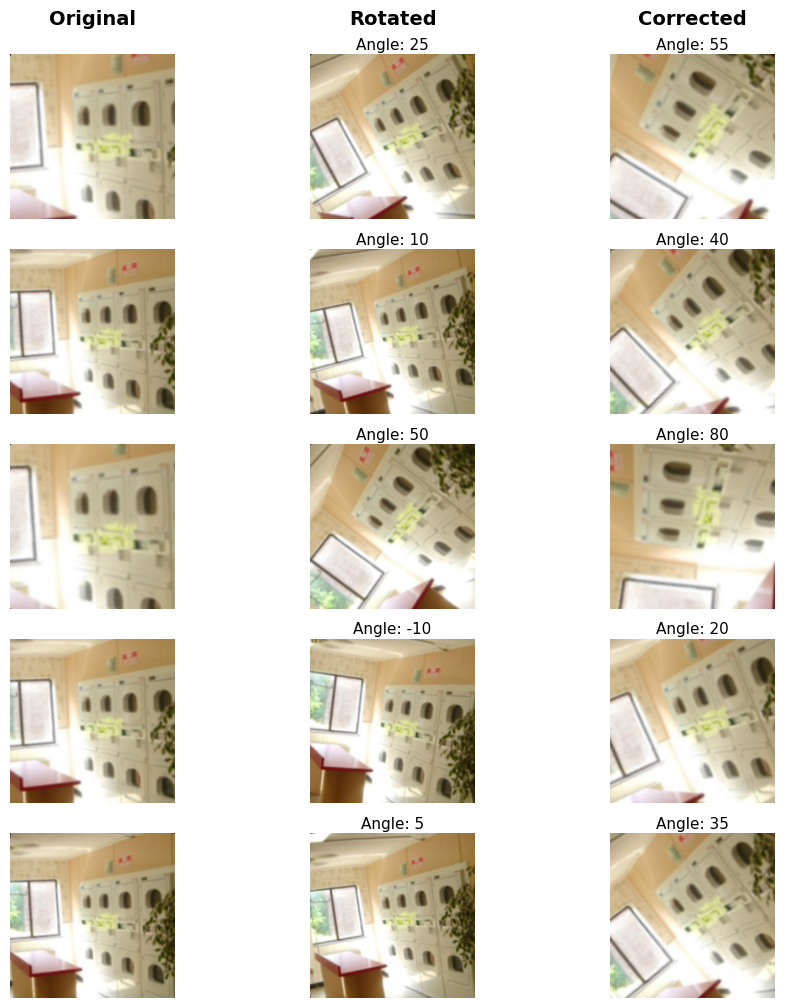

In [7]:
num_images = 5

display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)